## Many to Many

In [1]:
### importing the libraries
import pandas as pd
import numpy as np

In [2]:
### setting up the system path
import sys
sys.path.append('../')

In [3]:
### importing the src functions
from src.graphs.graphs_metrices import metrices, plot_predictions, plot_graphs_post_scaling

In [4]:
### loading up the data
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [5]:
### making the df_copy
df_copy = df.copy()
df_copy.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [10]:
### changing the dtype of the date
df['date'] = df['date'].astype(dtype = 'date64[pyarrow]')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [11]:
### features to target : ['close', 'high', 'low', 'open']
features_to_target = ['close', 'high', 'low', 'open']
features_to_target

['close', 'high', 'low', 'open']

In [12]:
### scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
df[features_to_target] = scaler.fit_transform(df[features_to_target])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19,0.079550,0.061271,0.075349,0.067057,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22,0.056763,0.055386,0.056197,0.053718,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23,0.055938,0.037493,0.013047,0.028295,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24,0.052935,0.030656,0.036028,0.035353,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25,0.027263,0.035998,0.025914,0.033798,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


feature : close


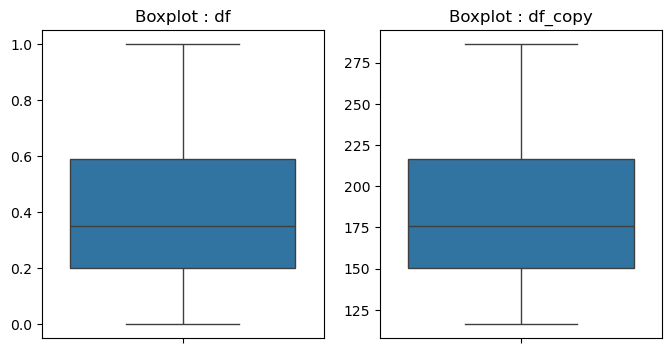

feature : high


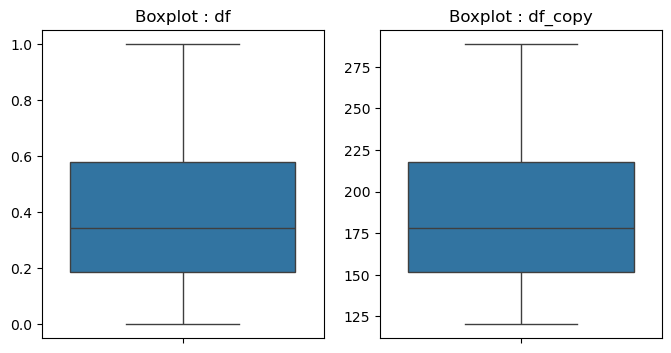

feature : low


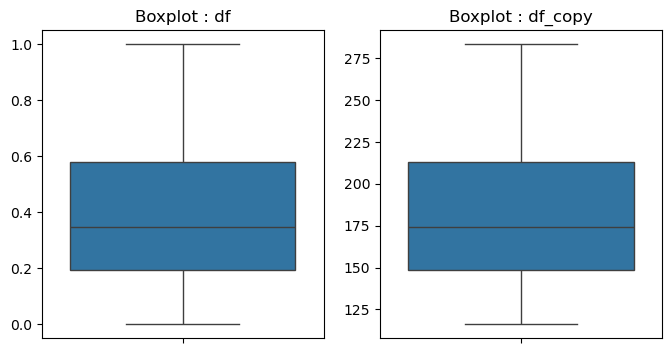

feature : open


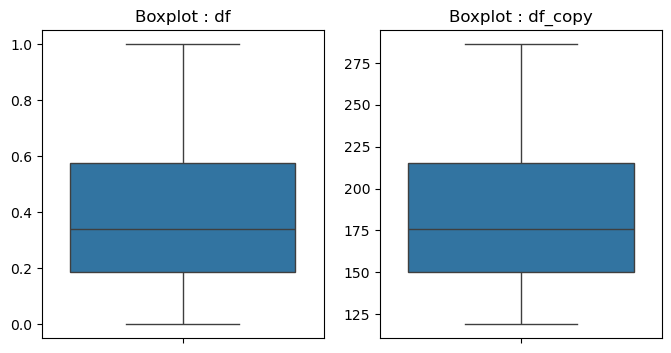

In [13]:
### plotting the graphs pre and post scaling
plot_graphs_post_scaling(df, df_copy, cols = features_to_target)

In [29]:
### making the sequences and the time period of 60 days
days = 60
X, y = [], []

for i in range(len(df) - days) : 

    X.append(df[features_to_target][i : i + days])
    y.append(df[features_to_target].iloc[i + days])

X = np.array(X)
y = np.array(y)

In [21]:
### checking the shape of the X and y
print(f"{X.shape} :: {y.shape}")

(1195, 60, 4) :: (1195, 4)


In [22]:
### verification of y
y

array([[0.05835247, 0.0388005 , 0.0536238 , 0.04659927],
       [0.04999117, 0.03915718, 0.05128972, 0.04504397],
       [0.04904905, 0.02682192, 0.03979891, 0.02470539],
       ...,
       [0.82093859, 0.84311921, 0.83332336, 0.855297  ],
       [0.86863334, 0.86725472, 0.83386199, 0.83160854],
       [0.87140081, 0.87040541, 0.87521695, 0.86480828]])

In [30]:
### checking the df['close'] from 61 to 64 index
df['close'].iloc[60 : 64]

60    0.058352
61    0.049991
62    0.049049
63    0.064476
Name: close, dtype: float64

In [31]:
### making the train and the test sequences (80-20)
test_size = int(len(df) * 0.80)
X_train, X_test = X[:test_size], X[test_size:]
y_train, y_test = y[:test_size], y[test_size:]

In [32]:
### checking the shape
print(f"{X_train.shape} :: {y_train.shape} \n{X_test.shape} :: {y_test.shape}")

(1004, 60, 4) :: (1004, 4) 
(191, 60, 4) :: (191, 4)


In [33]:
### libraries to build the model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [37]:
# ### building the sequential model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (days, 4)),
    Dropout(0.33),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(4, activation = 'linear')
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
### checking the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           804 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,604 (517.98 KB)

 Trainable params: 132,604 (517.98 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
### training the model
model.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0476 - mse: 0.0476
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0056 - mse: 0.0056
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0047 - mse: 0.0047
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0046 - mse: 0.0046
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0041 - mse: 0.0041
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0040 - mse: 0.0040
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0035 - mse: 0.0035
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0030 - mse: 0.0030
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0038 - mse: 0.0038
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0032 - mse: 0.0032
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0031 - mse: 0.0031
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0030 - mse: 0.0030
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━

In [40]:
### predicting the y
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


In [42]:
### checking the y_pred
y_pred.shape

(191, 4)

In [43]:
### inverse scaling the y_test and y_pred
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [44]:
### checking the both
y_pred

array([[205.2001 , 207.37852, 201.40417, 205.0609 ],
       [207.53294, 209.7443 , 203.72028, 207.42157],
       [209.2756 , 211.53712, 205.45737, 209.20058],
       [209.68225, 212.02164, 205.90071, 209.64523],
       [209.34114, 211.73328, 205.60548, 209.33965],
       [207.9736 , 210.38593, 204.30829, 207.99176],
       [206.07846, 208.53261, 202.48001, 206.1169 ],
       [203.1592 , 205.69507, 199.61983, 203.20349],
       [201.1051 , 203.63078, 197.62274, 201.1845 ],
       [199.89867, 202.36877, 196.50584, 199.97601],
       [199.3099 , 201.72664, 195.9688 , 199.37689],
       [198.96785, 201.36195, 195.6612 , 199.0756 ],
       [199.03355, 201.39252, 195.76613, 199.16577],
       [199.46527, 201.71419, 196.2551 , 199.59596],
       [200.18692, 202.32576, 197.06413, 200.30197],
       [200.66493, 202.74841, 197.56155, 200.76237],
       [201.27617, 203.31816, 198.18129, 201.35971],
       [201.62741, 203.67198, 198.54073, 201.69232],
       [201.79115, 203.87036, 198.66791, 201.8

In [45]:
### checking the y_test
y_test

array([[211.45  , 212.96  , 209.54  , 210.95  ],
       [211.26  , 212.57  , 209.77  , 212.36  ],
       [208.78  , 209.48  , 204.26  , 207.91  ],
       [206.86  , 208.47  , 205.03  , 207.67  ],
       [202.09  , 207.04  , 200.71  , 205.17  ],
       [201.36  , 202.75  , 199.7   , 200.71  ],
       [195.27  , 197.7   , 193.46  , 193.665 ],
       [200.21  , 200.74  , 197.43  , 198.3   ],
       [200.42  , 202.73  , 199.9   , 200.59  ],
       [199.95  , 203.81  , 198.51  , 203.575 ],
       [200.85  , 201.96  , 196.78  , 199.37  ],
       [201.7   , 202.13  , 200.12  , 200.28  ],
       [203.27  , 203.77  , 200.955 , 201.35  ],
       [202.82  , 206.24  , 202.1   , 202.91  ],
       [200.63  , 204.75  , 200.15  , 203.5   ],
       [203.92  , 205.7   , 202.05  , 203.    ],
       [201.45  , 206.    , 200.02  , 204.39  ],
       [202.67  , 204.35  , 200.57  , 200.6   ],
       [198.78  , 204.5   , 198.41  , 203.5   ],
       [199.2   , 199.68  , 197.3601, 199.08  ],
       [196.45  , 20

In [46]:
### printing the metrices
metrices(y_test, y_pred)

MAE : 6.2212178027407665
MSE : 58.609478643277924
RMSE : 7.6392573408851785


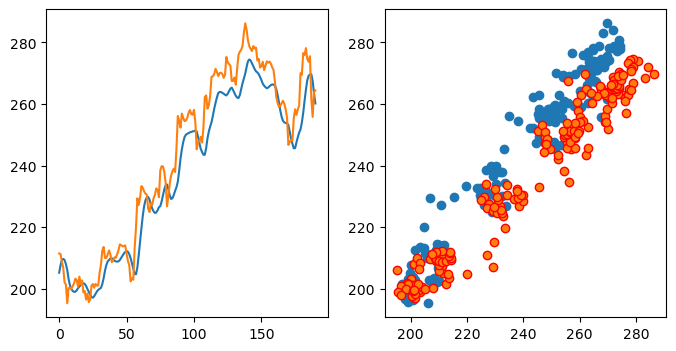

In [57]:
### plotting the graphs
plot_predictions(y_test[:, 0], y_pred[:, 0])